In [49]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [50]:
rev = pd.read_csv('C:/Users/Administrator/Downloads/yelp_labelled.csv', sep='\t',header=None)
rev.rename(columns = {0:'reviews',1:'sentiment'},inplace=True)


In [51]:
rev.head()

,reviews,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [52]:
rev.columns

Index(['reviews', 'sentiment'], dtype='object')

In [53]:
rev.head()

,reviews,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [54]:
yelp = rev['reviews'].str.lower().str.replace('[^a-z ]','')
yelp.head()

0                                 wow loved this place
1                                    crust is not good
2             not tasty and the texture was just nasty
3    stopped by during the late may bank holiday of...
4    the selection on the menu was great and so wer...
Name: reviews, dtype: object

In [55]:
import nltk
stopwords= nltk.corpus.stopwords.words('english')
stemmer= nltk.stem.PorterStemmer()

def clean_senetence(text):
    words=text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean = yelp.apply(clean_senetence)
docs_clean.head()

0                                       wow love place
1                                           crust good
2                                   tasti textur nasti
3    stop late may bank holiday rick steve recommen...
4                              select menu great price
Name: reviews, dtype: object

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer(min_df=5)
vectorizer.fit(docs_clean)
hot= vectorizer.transform(docs_clean)
hot

<1000x273 sparse matrix of type '<class 'numpy.int64'>'
	with 3468 stored elements in Compressed Sparse Row format>

In [57]:
df_hot= pd.DataFrame(hot.toarray(), columns= vectorizer.get_feature_names())
(df_hot==0).sum().sum()

269532

In [58]:
from sklearn.model_selection import train_test_split
train_x, test_x= train_test_split(df_hot, test_size= 0.2, random_state=100)

In [59]:
train_y = rev.iloc[train_x.index]['sentiment']
test_y = rev.iloc[test_x.index]['sentiment']

In [60]:
from sklearn.naive_bayes import MultinomialNB

mnb_model= MultinomialNB()
mnb_model.fit(train_x, train_y)
mnb_predict_class= mnb_model.predict(test_x)
accuracy_score(test_y, mnb_predict_class)

0.79

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model= RandomForestClassifier(random_state= 100, n_estimators= 500)
rf_model.fit(train_x, train_y)
rf_predict_class= rf_model.predict(test_x)
accuracy_score(test_y, rf_predict_class)

0.81

In [72]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier(random_state=100,n_estimators=400)
ab_model.fit(train_x,train_y)
ab_pred = ab_model.predict(test_x)
accuracy_score(test_y,ab_pred)

0.77

ROC Curve 

Multinomian NB AUC: 0.85
Random Forest AUC: 0.89
AdaBoost Classifier AUC: 0.82


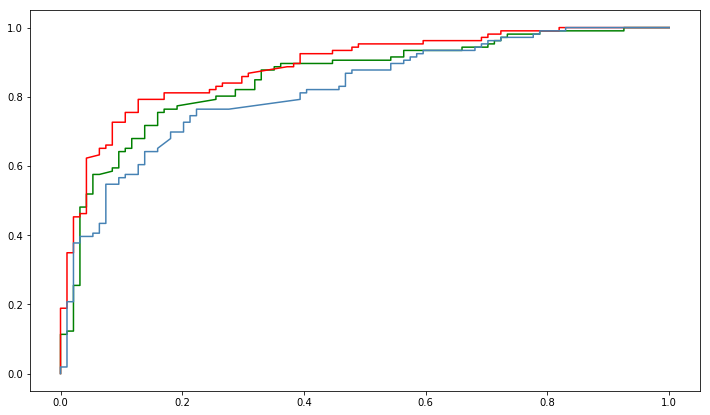

In [73]:
plt.figure(figsize=(12,7))
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
prob1 = pd.DataFrame(mnb_model.predict_proba(test_x),columns=['Neg_1','Pos_2'])
fpr,tpr,cutoffs = roc_curve(test_y,prob1['Pos_2'],pos_label=1)
auc_mnb =auc(fpr,tpr)
plt.plot(fpr,tpr,color='green')
print('Multinomian NB AUC: %.2f' % auc_mnb)

prob2 = pd.DataFrame(rf_model.predict_proba(test_x),columns=['Neg_1','Pos_2'])
fpr,tpr,cutoffs = roc_curve(test_y,prob2['Pos_2'],pos_label=1)
auc_rf =auc(fpr,tpr)
plt.plot(fpr,tpr,color='red')
print('Random Forest AUC: %.2f' % auc_rf)

prob3 = pd.DataFrame(ab_model.predict_proba(test_x),columns=['Neg_1','Pos_2'])
fpr,tpr,cutoffs = roc_curve(test_y,prob3['Pos_2'],pos_label=1)
auc_ab=auc(fpr,tpr)
plt.plot(fpr,tpr,color='steelblue')
print('AdaBoost Classifier AUC: %.2f' % auc_ab)


Kaggle word2vec link - [https://www.kaggle.com/anaswaraelizabeth/word2-vec-assignment2] 

analysis using vader package. 

In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
def get_sentiment(doc):
    score = sentiment.polarity_scores(doc)['compound']
    if(score>0):
        return 1
    else:
        return 0
sent_pred =rev['reviews'].apply(get_sentiment)
print(accuracy_score(rev['sentiment'],sent_pred))

0.812


In [65]:
docs = rev['reviews'].fillna('').str.lower().str.replace('[^a-z ]', '')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['','use', 'good', 'like', 'great'])
stemmer = nltk.stem.PorterStemmer()
docs_clean=[]
for doc in docs:
    words=doc.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
   
    docs_clean.append(words_clean)
len(docs_clean)

1000

In [66]:
import gensim
dictionary = gensim.corpora.Dictionary(docs_clean)
dictionary

docs_bow = []
for doc in docs_clean:
    doc_bow = dictionary.doc2bow(doc)
    docs_bow.append(doc_bow)

In [67]:
lda_model = gensim.models.LdaModel(docs_bow,
                                  id2word = dictionary,
                                  num_topics = 7)

lda_model.get_document_topics(docs_bow[0])

[(0, 0.035991173),
 (1, 0.03583652),
 (2, 0.78474087),
 (3, 0.035807632),
 (4, 0.035919853),
 (5, 0.035820607),
 (6, 0.035883334)]

In [68]:
doc2topic_prob = lda_model.get_document_topics(docs_bow[0])

doc2topic_prob = pd.DataFrame(doc2topic_prob, columns=['topic','prob'])

doc2topic_prob.sort_values('prob', ascending = False).iloc[0]['topic']

2.0

In [69]:
topics = []
for doc_bow in docs_bow:
    doc2topic_prob = lda_model.get_document_topics(doc_bow)
    doc2topic_prob = pd.DataFrame(doc2topic_prob, columns=['topic','prob'])
    topic = doc2topic_prob.sort_values('prob', ascending = False).iloc[0]['topic']
    topics.append(topic)

In [70]:
rev['topics'] = topics
topic_count =rev['topics'].value_counts()
topic_count=pd.DataFrame(topic_count).reset_index()
topic_count


,index,topics
0,3.0,201
1,4.0,174
2,6.0,133
3,0.0,130
4,2.0,129
5,1.0,124
6,5.0,109


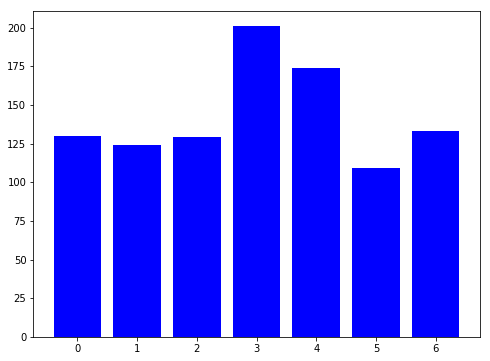

In [74]:
#Bar chart

fig = plt.figure(figsize=(8,6))
plt.bar((topic_count['index']),topic_count['topics'],color='blue')
plt.show()